In [98]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [99]:
!pip install matplotlib

In [151]:
import matplotlib.pyplot as plt

In [100]:
data = pd.read_csv("Customer_Feedback_Data.csv")

In [133]:
print(data.head(5050))

      Customer_ID  Satisfaction_Score  Feedback_Comments  \
0               1                10.0     Very satisfied   
1               2                 3.0     Very satisfied   
2               3                10.0     Very satisfied   
3               4                 7.0  Needs improvement   
4               5                 8.0     Unsatisfactory   
...           ...                 ...                ...   
5045          757                 9.0       Good service   
5046          969                 2.0     Unsatisfactory   
5047          248                 4.0       Good service   
5048           58                 4.0     Unsatisfactory   
5049          635                 4.0     Very satisfied   

      Likelihood_to_Recommend  Cluster  
0                           9        2  
1                           3        0  
2                           1        1  
3                           4        1  
4                           7        2  
...                       ...    

In [134]:
features = data[['Satisfaction_Score', 'Likelihood_to_Recommend']]

In [135]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [136]:
kmeans = KMeans(n_clusters=3, random_state=42)

In [137]:
print(scaled_features[:5050])

[[ 1.19662762  1.19341358]
 [-0.7445023  -0.89309271]
 [ 1.19662762 -1.58859481]
 ...
 [-0.46719803 -0.89309271]
 [-0.46719803  1.54116463]
 [-0.46719803  0.15016043]]


In [138]:
from sklearn.cluster import KMeans
print(KMeans)

<class 'sklearn.cluster._kmeans.KMeans'>


In [159]:
features = features.fillna(features.mode())

In [160]:
print(features.isnull().sum())

Satisfaction_Score         0
Likelihood_to_Recommend    0
dtype: int64


In [161]:
scaler = StandardScaler()

In [162]:
scaled_features = scaler.fit_transform(features)

In [163]:
kmeans = KMeans(n_clusters=3, random_state=42)

In [164]:
clusters = kmeans.fit_predict(scaled_features)

In [165]:
data = data.dropna()

In [166]:
data['Cluster'] = clusters

In [167]:
print(data[['Customer_ID', 'Satisfaction_Score', 'Likelihood_to_Recommend', 'Cluster']].head(5050))

      Customer_ID  Satisfaction_Score  Likelihood_to_Recommend  Cluster
0               1                10.0                        9        2
1               2                 3.0                        3        0
2               3                10.0                        1        1
3               4                 7.0                        4        1
4               5                 8.0                        7        2
...           ...                 ...                      ...      ...
5045          757                 9.0                        3        1
5046          969                 2.0                        2        0
5047          248                 4.0                        3        0
5048           58                 4.0                       10        2
5049          635                 4.0                        6        0

[4949 rows x 4 columns]


In [168]:
print(data['Cluster'].value_counts())

Cluster
2    2137
1    1411
0    1401
Name: count, dtype: int64


In [170]:
cluster_summary = data.groupby('Cluster')[['Satisfaction_Score', 'Likelihood_to_Recommend']].mean()

In [171]:
print(cluster_summary)

         Satisfaction_Score  Likelihood_to_Recommend
Cluster                                             
0                  2.895075                 3.609565
1                  8.474132                 3.283487
2                  5.671970                 8.360786


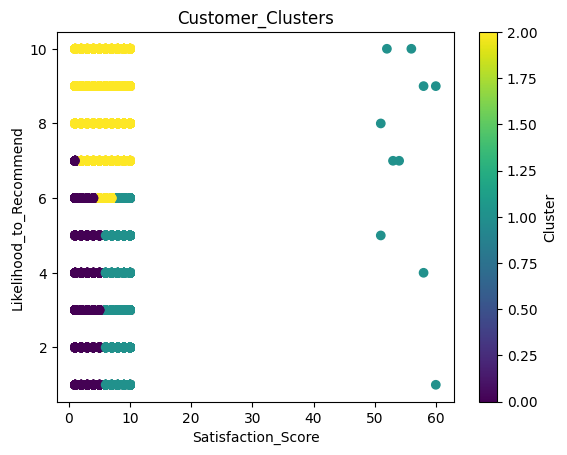

In [172]:
plt.scatter(data['Satisfaction_Score'], data['Likelihood_to_Recommend'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Satisfaction_Score')
plt.ylabel('Likelihood_to_Recommend')
plt.title('Customer_Clusters')
plt.colorbar(label='Cluster')
plt.show()

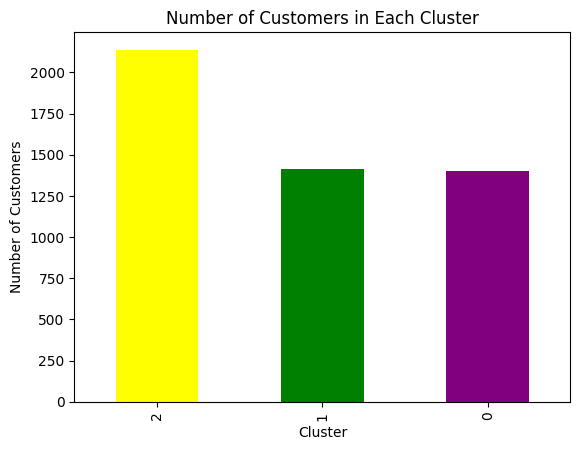

In [181]:
data['Cluster'].value_counts().plot(kind='bar', color=['yellow', 'green', 'purple'])
plt.title('Number of Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()